<a href="https://colab.research.google.com/github/mudu89/ML_AssignmentPS01/blob/main/2024DA04200_Problem_Statement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
%cd /content/drive/MyDrive/ML_Assignment_01/ML_AssignmentPS01

/content/drive/MyDrive/ML_Assignment_01/ML_AssignmentPS01


### **1. Importing the dataset:**

Read the dataset from the path into a pandas dataframe.

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler
dataset_file = './risk_factors_cervical_cancer.csv'

df = pd.read_csv(dataset_file)

### **2. Data Exploration and Analysis:**

In this section, we will perform exploratory analysis of the dataset to get insight of the data, and understand the correlation of the variables.

We will also identify if the correlation analysis helps in the feature selection process.

In [143]:
pd.set_option('display.max_columns', None)
print("The shape of the given dataset is:", df.shape)
print("Sanity Check:")
df.head(2)

The shape of the given dataset is: (858, 36)
Sanity Check:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

We have a total of 35 attributes and 1 target variable in the dataset. There are mix of numeric and categorical data.

10 attributes are numeric and 26 are categorical.

We can group the columns into :
  
  a) Demographic data: Age, Number of sexual partners, First Sexual intercourse, number of pregnancies.

  b) Behavorial data: Smokes, Contraceptive usage.

  c) Medical history data: STDs, Cancer, CIN, HPV.
  
  d) Diagnosis data: Hinselmann, Schiller, Citology, Biopsy

**2.1. Univariate Analysis (Categorical Attributes):**

In this section, we will perform analysis of the categorical attributes to get more insights on their data.

In [145]:
df.describe(exclude=['int64'])

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858
unique,13,22,12,3,31,63,3,41,3,27,3,6,3,2,3,3,3,3,3,3,2,3,3,3,19,19
top,2.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
freq,272,163,270,722,722,722,481,269,658,658,674,674,709,753,749,710,735,752,752,752,753,735,752,751,787,787


From the above table, we can identify that majority of the attributes are having 3 or less unique values.

Also the frequency of the top value for such attributes is more than 70% of the total count.



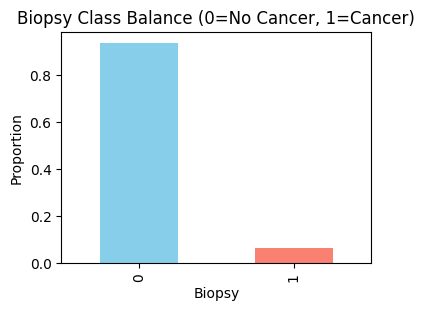

In [146]:
plt.figure(figsize=(4,3))
df['Biopsy'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Biopsy Class Balance (0=No Cancer, 1=Cancer)')
plt.ylabel('Proportion')
plt.show()

There is a very high class imbalance on the target variable.

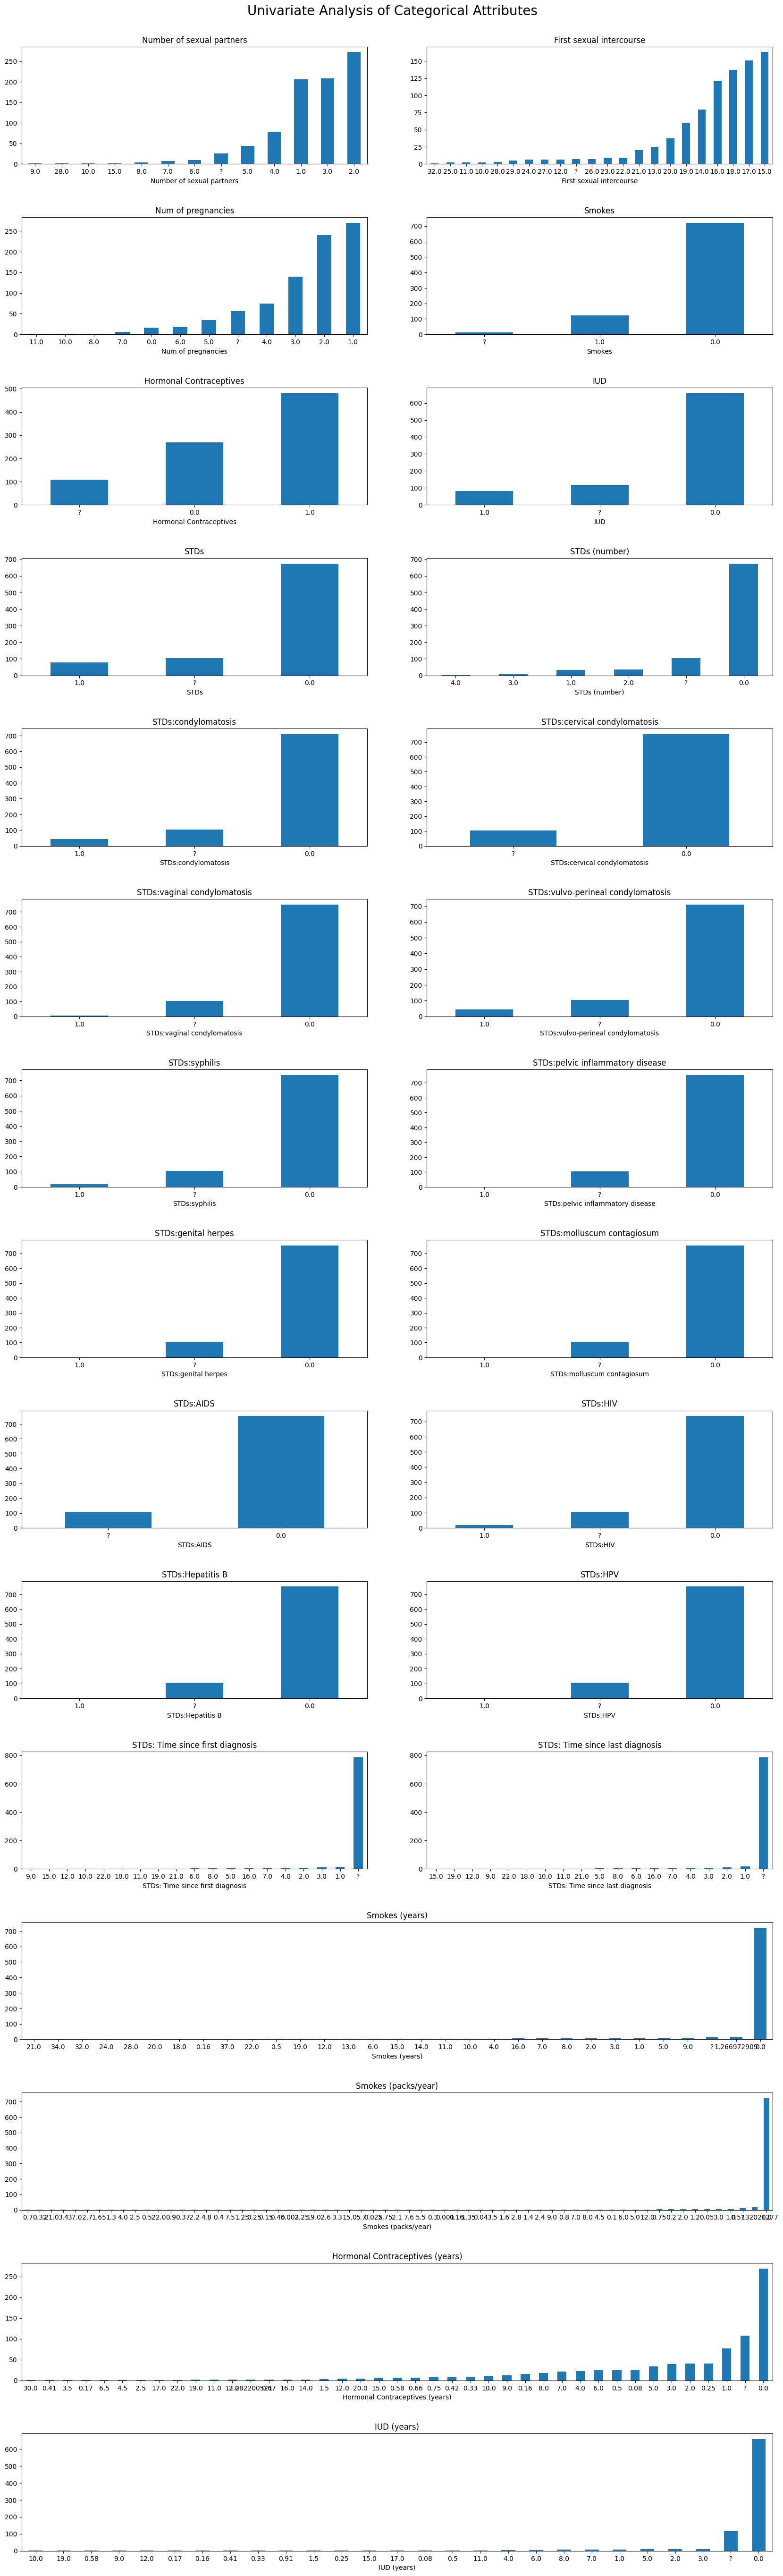

In [147]:

fig, a = plt.subplots(15, 2, figsize=(18, 55))
fig.tight_layout(pad=6.0)
fig.align_titles()
fig.suptitle('Univariate Analysis of Categorical Attributes',y=1.0,va='top',fontsize=20)

axes = a.flatten()
gs = axes[0].get_gridspec()


sbplt_barh = 0
full_width_row = 11
for col in df.select_dtypes(include='object').columns:
  # Select the current axis
  if df[col].nunique() <= 25:
    kind = 'bar'
    ax = axes[sbplt_barh]
    sbplt_barh += 1
  else:
    kind = 'bar'
    axes[full_width_row * 2].remove()
    axes[full_width_row * 2 + 1].remove()
    ax = fig.add_subplot(gs[full_width_row, :])
    full_width_row += 1

  # # Use the selected axis
  df[col].value_counts(normalize=False).sort_values(ascending=True).plot(ax=ax, kind=kind, rot=0)
  ax.set_title(col) # Set title for clarity
plt.show()

The first sexual encounter chart shows that majority of the participants had their first encounter below the age of 16 and the number of partners chart indicates maximum participants had less than 3.

The bar chart for number of pregnancies shows that most women in the dataset
have between 1 and 3 pregnancies, with very few having more than 6.

The smoking status chart indicates that non-smokers form the majority, suggesting smoking is less common in this group.

The STDS, IUD and Hormanal contraceptives indicate high volume of 0 and '?' values.

**2.2: Univariate analysis of Numeric data:**

In this section, we will perform analysis of the numeric attributes to get more insights on their data.

In [148]:
df.describe(exclude='object')

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above table, we can see that the highest age is 84 and lowest is 13 with mean of 26. This indicates a spread of different age groups in the dataset.

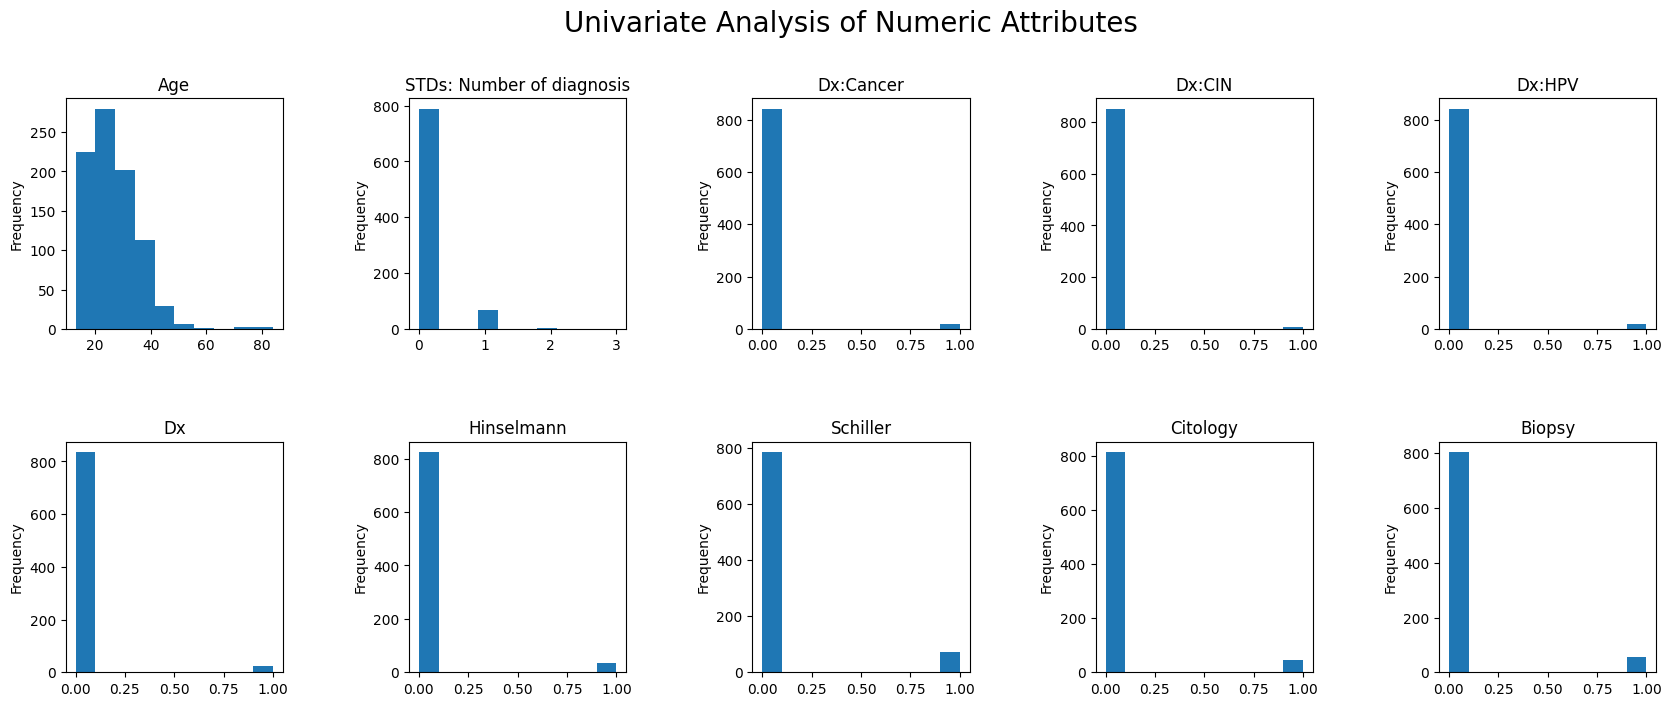

In [149]:
fig, a = plt.subplots(5, 5, figsize=(18, 18))
fig.tight_layout(pad=6.0)
fig.align_titles()
fig.suptitle('Univariate Analysis of Numeric Attributes',y=1.0,va='top',fontsize=20)

axes = a.flatten()
# gs = axes[0].get_gridspec()


# sbplt_barh = 0
# full_width_row = 11
for index, col in enumerate(df.select_dtypes(include='int64').columns):
  ax=axes[index]
  df[col].plot(kind='hist', ax=ax)
  ax.set_title(col) # Set title for clarity

num_of_attributes = (df.dtypes == 'int64').sum()
for ax in axes[num_of_attributes:]:
  fig.delaxes(ax)
plt.show()

The age histogram is right-skewed, with a concentration of women in their late 20s to early 40s and fewer older participants.  
Other numeric medical test results appear heavily zero-inflated, reflecting that many participants did not exhibit those conditions.

**2.3: Bivariate Analysis with the target variable:**

As seen in the univarte analysis, all the categorical attributes are having numbers as strings. Hence, we can convert all those attributes into numbers and perform a single correlation analysis using heatmap.

To perform correlation analysis using a heatmap, we need to convert all relevant columns to a numeric data type. The object type columns that contain '?' as a value need to be handled. I will replace '?' with NaN (Not a Number) and then convert these columns to a numeric type. NaN values are standard representations for missing data in pandas and can be handled appropriately in subsequent steps.

In [150]:
df_copy = df.copy()

for col in df_copy.select_dtypes(include='object').columns:
    df_copy[col] = df_copy[col].replace('?', np.nan)
    df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

display(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

None

In [151]:
# Correlation with target variable
corr_target = df_copy.corr(numeric_only=True)['Biopsy'].sort_values(ascending=False)
print("Correlation of features with Biopsy:")
print(corr_target)


Correlation of features with Biopsy:
Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.132526
STDs:HIV                              0.126880
Dx:CIN                                0.113172
STDs                                  0.109099
STDs (number)                         0.098347
STDs: Number of diagnosis             0.097449
STDs:vulvo-perineal condylomatosis    0.088902
STDs:condylomatosis                   0.086390
Hormonal Contraceptives (years)       0.079388
Smokes (years)                        0.062044
Age                                   0.055956
IUD                                   0.053194
Num of pregnancies                    0.046416
IUD (years)            

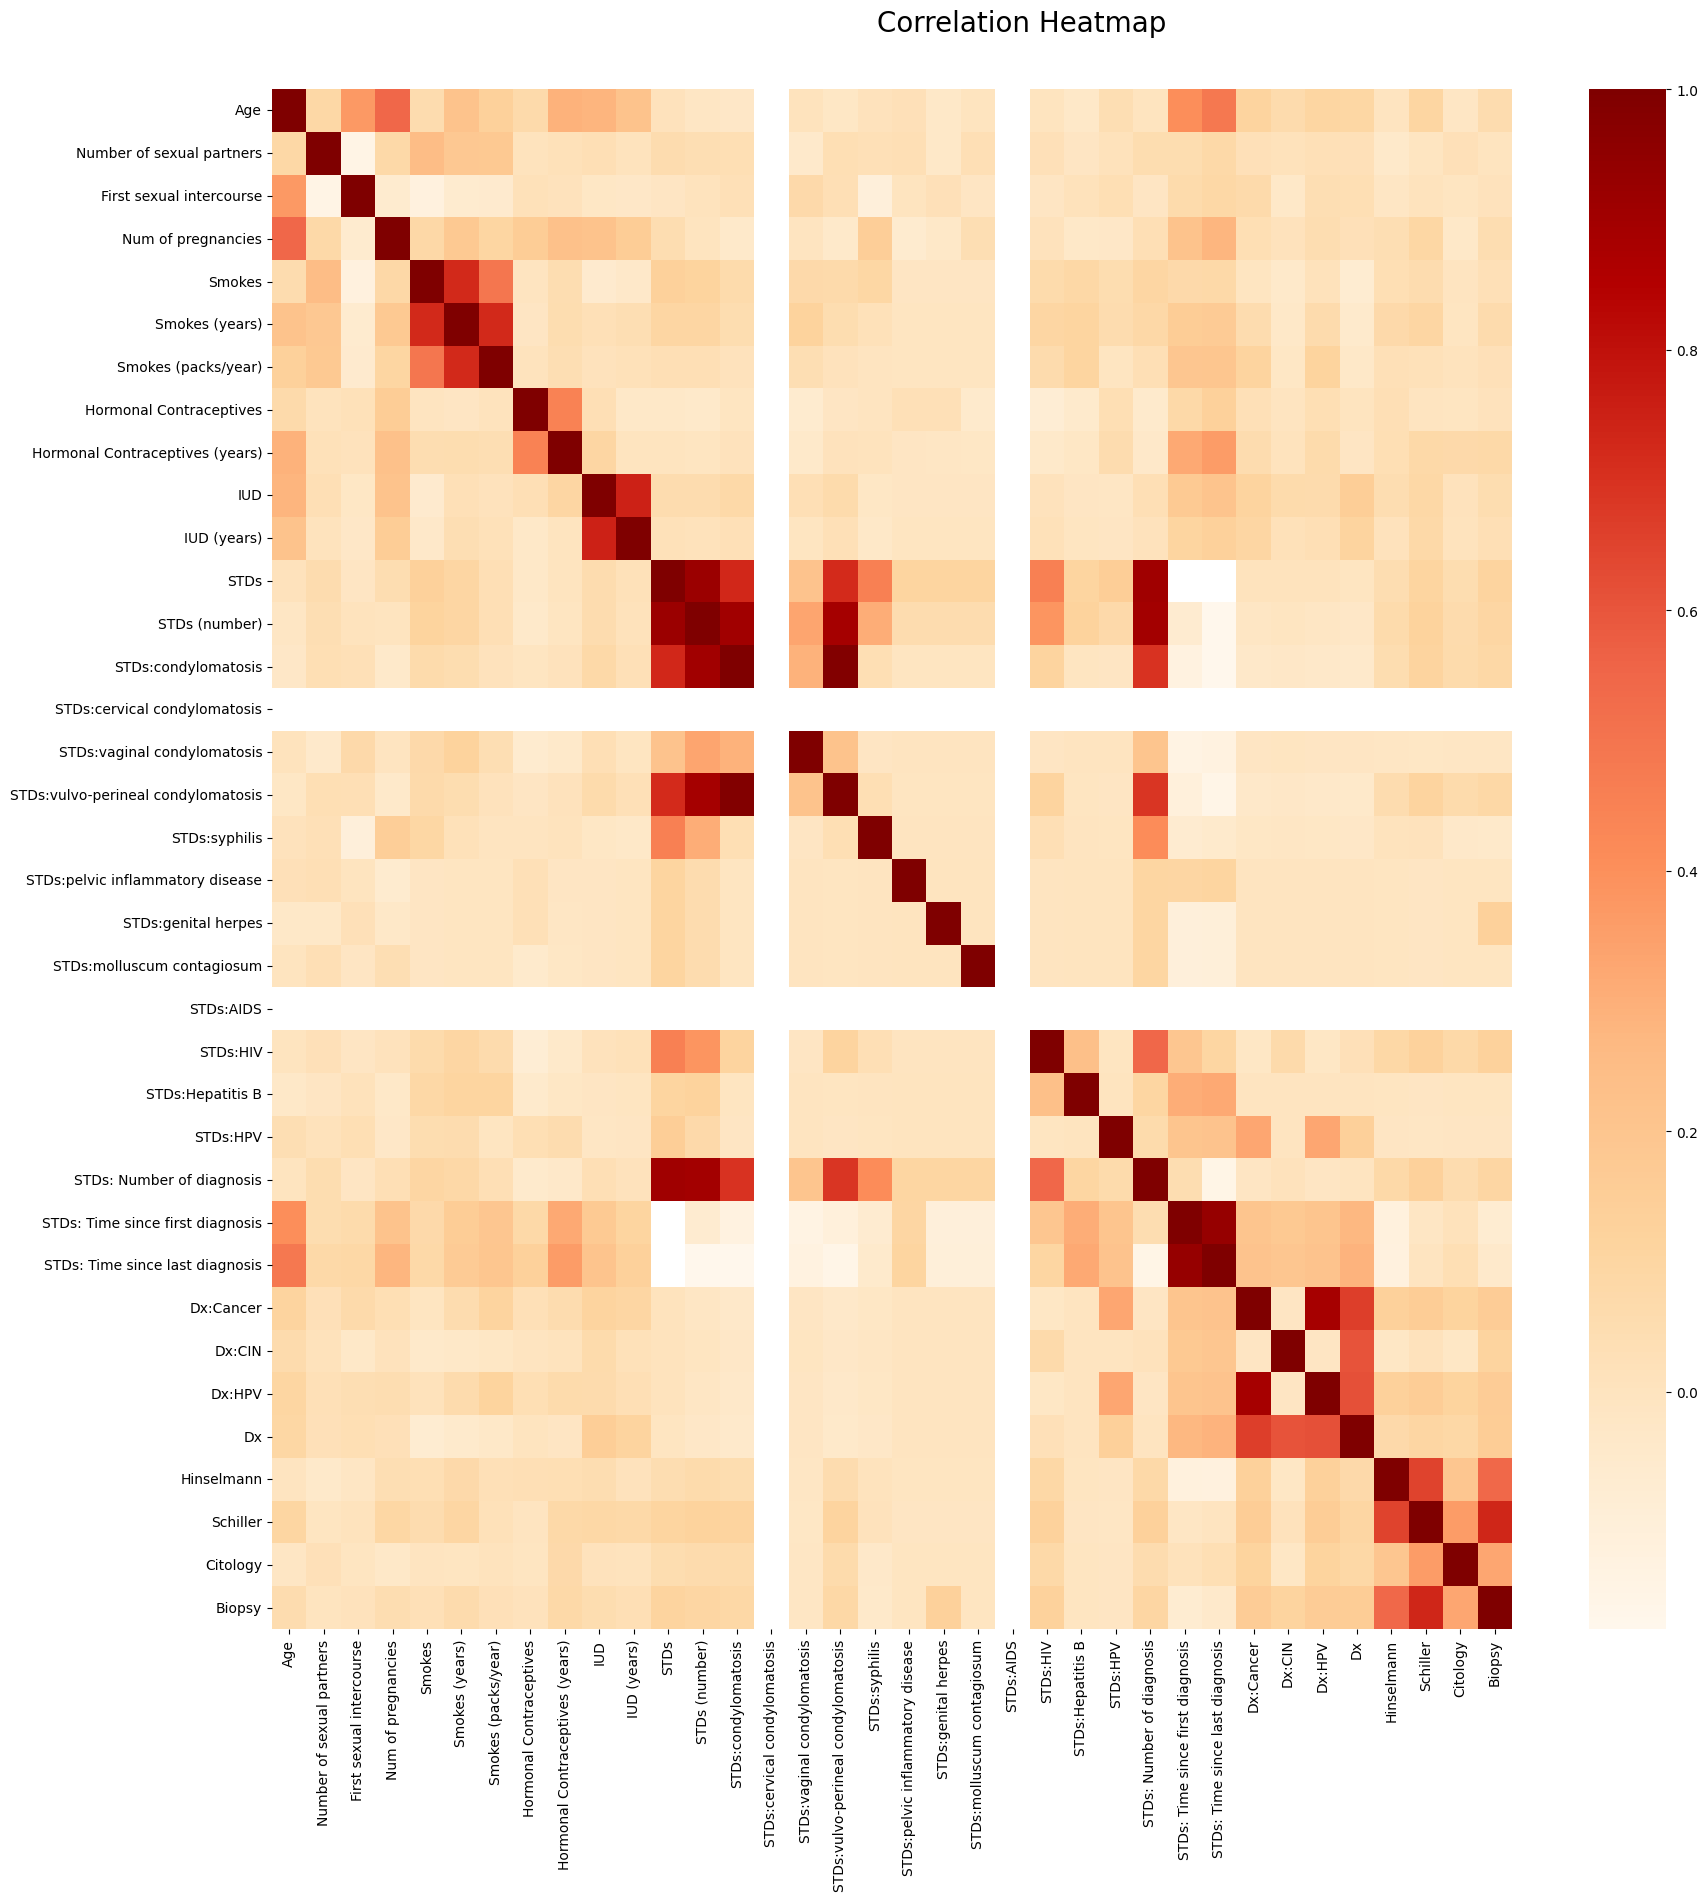

In [152]:
#plt.figure(figsize=(20, 15))
corr_matrix = df_copy.corr()
f, ax = plt.subplots(figsize=(20, 20))
f.suptitle('Correlation Heatmap',y=0.92,va='top',fontsize=20)
sns.heatmap(corr_matrix, annot=False, cmap='OrRd', ax=ax)
plt.show()

***Inference and Conclusion:***

Correlation helps spot strong linear relationships with the target.

Based on the heatmap and correlation analysis, we can identify correlation with the target variable as below:

*    Top correlated features with Biopsy are Schiller (0.73), Hinselmann (0.55), Citology (0.33)
*   Many STD-related features have weak correlations (below 0.15).
*   Age, Contraceptive choice, and sexual preferences seem to have very neglibile correlation with the target.
*   Several columns have NaN correlations due to constant values (e.g., STDs:AIDS always 0).

Effect on feature selection:

Strongly correlated features like Schiller, Hinselmann, and Citology are prime candidates to keep.

Weakly correlated ones may still hold value in non-linear models (like Decision Trees or Ensemble Methods), so we shouldn’t remove them solely based on correlation.

Features with almost no variance or with excessive missing values might be removed in preprocessing to reduce noise.

Strong correlation between independent variables themselves (multicollinearity) can reduce the stability of coefficients in linear models, even if each variable is useful individually.  
Example : STD's and STDs:Number of Diagnosis,
Dx: Cancer and Dx: HPV
  
**Conclusion:** Correlation analysis is a useful guide for identifying potentially important features and for spotting redundancy, but it should be combined with domain knowledge and other feature selection methods before making final decisions.

### **3. Data Preprocessing and Cleaning:**

In the previous section, we performed and identified the insights of the data attributes.

Based on the univariate analysis, we can now proceed to cleanup the data and perform preprocessing steps like:

a) NULL processing

b) Missing values cleanup

c) Managing skwed data

d) Identifying and processing outliers

e) Feature selection after data preprocessing. etc...

**3.1. Handling missing/null values and data transformation:**

From the univarite analysis, the categorical attributes are numbers and can be converted to numeric datatype.

We will replace the '?' values with NaN before converting all attributes to numeric.

We can handle the missing and NaN values by replacing them with the median value for the numeric attributes.

Justification: The median is chosen because it is less influenced by extreme values compared to the mean, which makes it more robust when data is skewed.


In [153]:
# Replace '?' with NaN and transform objects to numeric datatype:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for isnull/isna
print("Check for null values:")
print(df.isnull().sum())


Check for null values:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepati

In [154]:
cols = df.columns
df[cols] = df[cols].fillna(df[cols].median())
df.sample(5, random_state=42)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
713,16,1.0,16.0,1.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,3.0,0,0,0,0,0,0,0,0
604,23,3.0,17.0,2.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,3.0,0,0,0,0,0,0,0,0
120,33,1.0,16.0,4.0,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,3.0,0,0,0,0,0,0,0,0
208,27,4.0,16.0,1.0,0.0,0.0,0.000,1.0,0.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,3.0,0,0,0,0,0,0,0,0
380,18,3.0,15.0,1.0,1.0,2.0,0.003,1.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,3.0,0,0,0,0,0,0,0,0


In [155]:
#Check for null after preprocessing:
print("Check for null values:")
print(df.isna().sum())

Check for null values:
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV         

**3.2: Outlier Detection:**

Outliers are extreme or odd values lies far outside the general “pattern” or distribution in the dataset.

They distort/skew data resulting in less accuracy of the model.

We can identify outlier visually using boxplots/scatter plots and statistically using IQR method/z-score.


Justification: From the univariate analysis, only the below attributes are identified with variable values, whereas the rest of the attributes are either 0s or binary values (0,1). Hence selecting the below attributes for outlier analysis.
*   Age
*   Number of Sexual Partners
*   Number of Pregnancies
*   First Sexual encounter
*   Hormonal Contraceptives(Years)






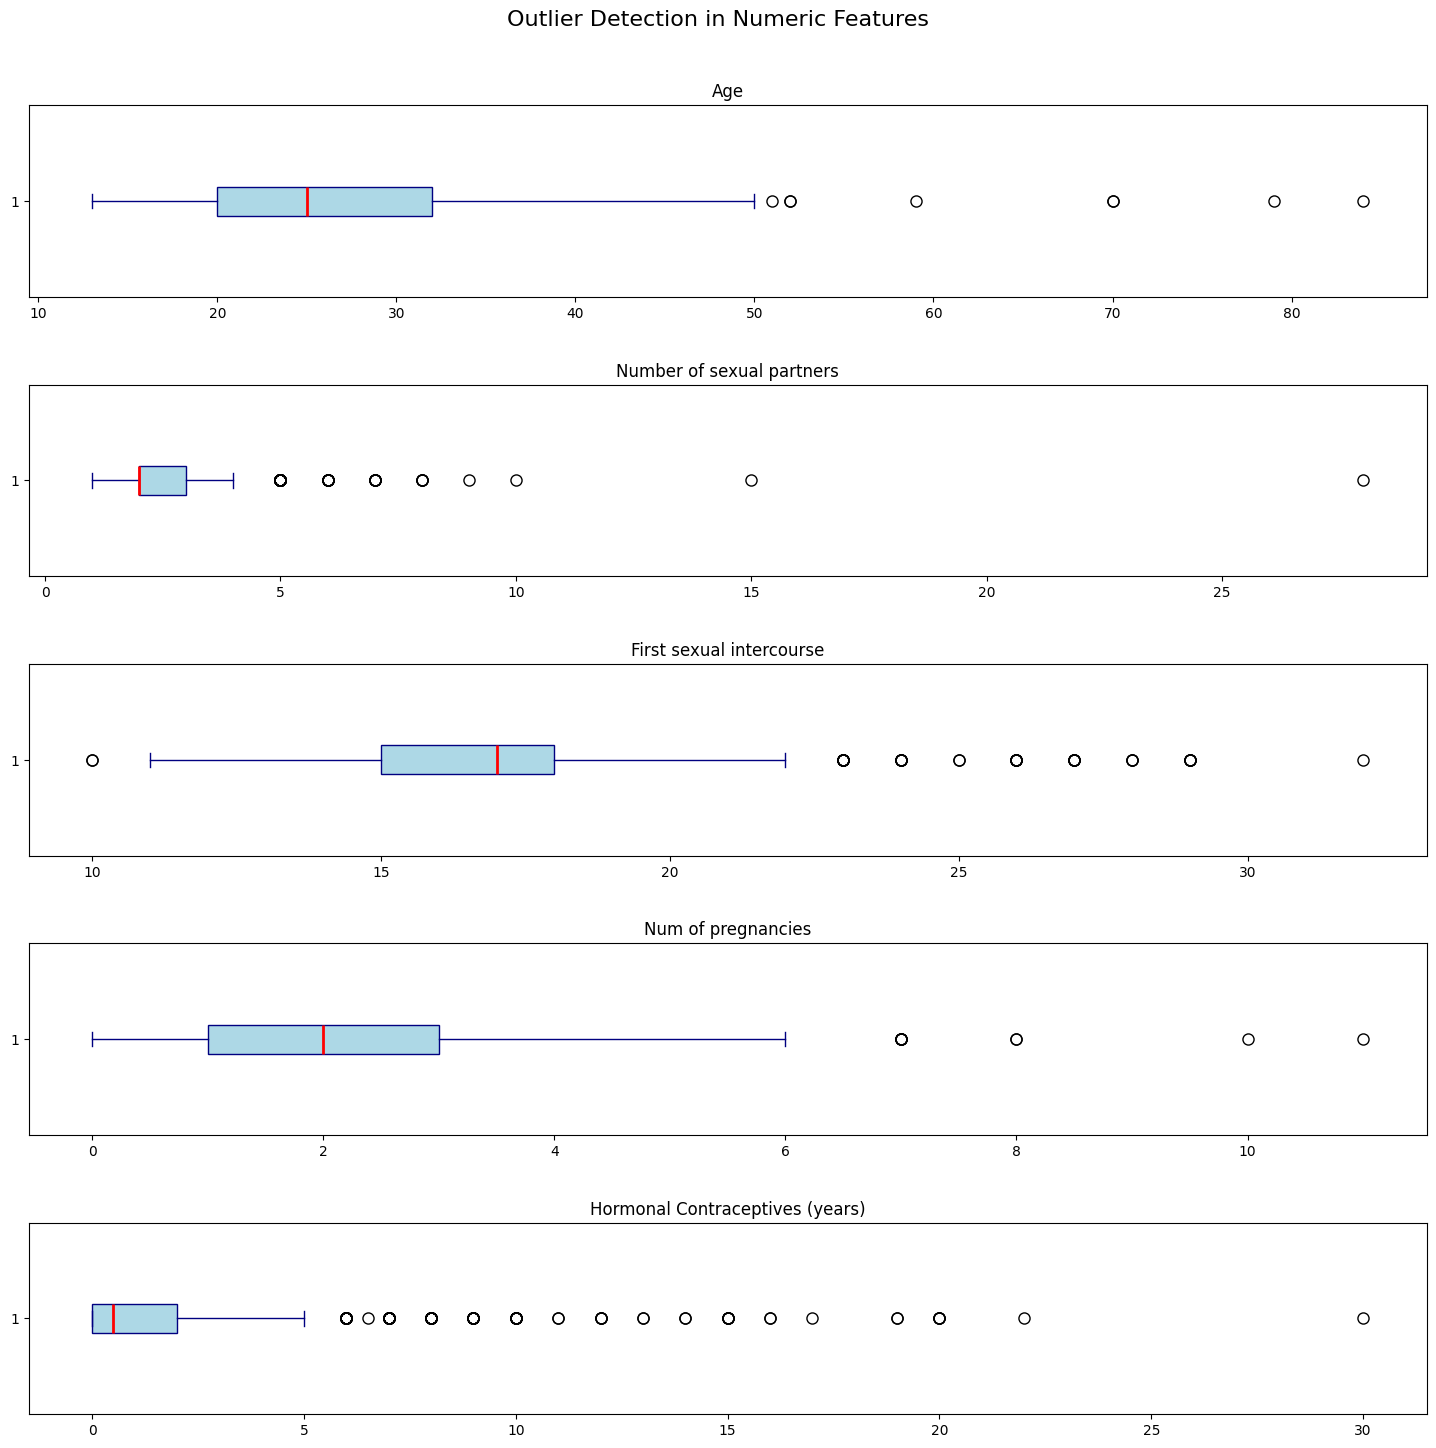

In [156]:
plt.figure(figsize=(15, 15))
#fig, a = plt.subplots(15, 2, figsize=(18, 55))
columns = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies','Hormonal Contraceptives (years)']
for i, col in enumerate(columns, 1):
    plt.subplot(5, 1, i)
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='navy'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='navy'),
            capprops=dict(color='navy'),
            flierprops=dict(marker='o', color='darkorange', markersize=8))
    plt.title(col)

plt.suptitle("Outlier Detection in Numeric Features",y=0.98,va='top', fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

**Inference:**

Based on the boxplot charts, we can infer that there are outliers in the identified columns.

We are using capping to limit the values for 2 columns:

a) Number of sexual partners: 28 seems extreme and could be data entry anomaly.

b) First sexual intercourse: 32 is removed as it is rare.

**3.3: Skew Analysis:**



In [157]:
skewness = df[columns].skew().sort_values(ascending=False)
print("Feature skewness:")
print(skewness)

Feature skewness:
Number of sexual partners          5.542012
Hormonal Contraceptives (years)    2.868247
First sexual intercourse           1.570731
Num of pregnancies                 1.505086
Age                                1.394279
dtype: float64


From the skew analysis, we can identify that all the given attributes are highly skewed.

This matches what we saw in the outlier analysis, the skew is driven by those extreme high values.

We can perform transformation and capping to reduce the skewness.

In [158]:
# #Capping the values for Number of sexual partners and first sexual partner
# capped_cols_values = {'Number of sexual partners': 15, 'First sexual intercourse': 10}

#First sexual intercourse
Q1 = df['First sexual intercourse'].quantile(0.25)
Q3 = df['First sexual intercourse'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
df['First sexual intercourse'] = np.where(df['First sexual intercourse'] < lower_bound, lower_bound, df['First sexual intercourse'])

# #Number of sexual partners
df['Number of sexual partners'] = np.where(df['Number of sexual partners'] > 15.0, 15.0, df['Number of sexual partners'])

#Hormonal Contraceptives (years)
df['Hormonal Contraceptives (years)'] = np.where(df['Hormonal Contraceptives (years)'] > 30.0, 3.0, df['Hormonal Contraceptives (years)'])

# Perform log transformation on columns:
for col in columns:
    if col != 'Biopsy':
      df[col] = np.log1p(df[col])
#df['Hormonal Contraceptives (years)'] = np.log1p(df['Hormonal Contraceptives (years)'])

skewness = df[columns].skew().sort_values(ascending=False)
print("Feature skewness after capping and transformation:")
print(skewness)

Feature skewness after capping and transformation:
Hormonal Contraceptives (years)    1.089397
First sexual intercourse           0.842855
Number of sexual partners          0.441585
Age                                0.298414
Num of pregnancies                 0.171105
dtype: float64


Post transformation, the skewness has reduced

**3.4: Standardisation or Normalization:**

In [159]:

num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop('Biopsy')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

**3.5: Feature Engineering:**

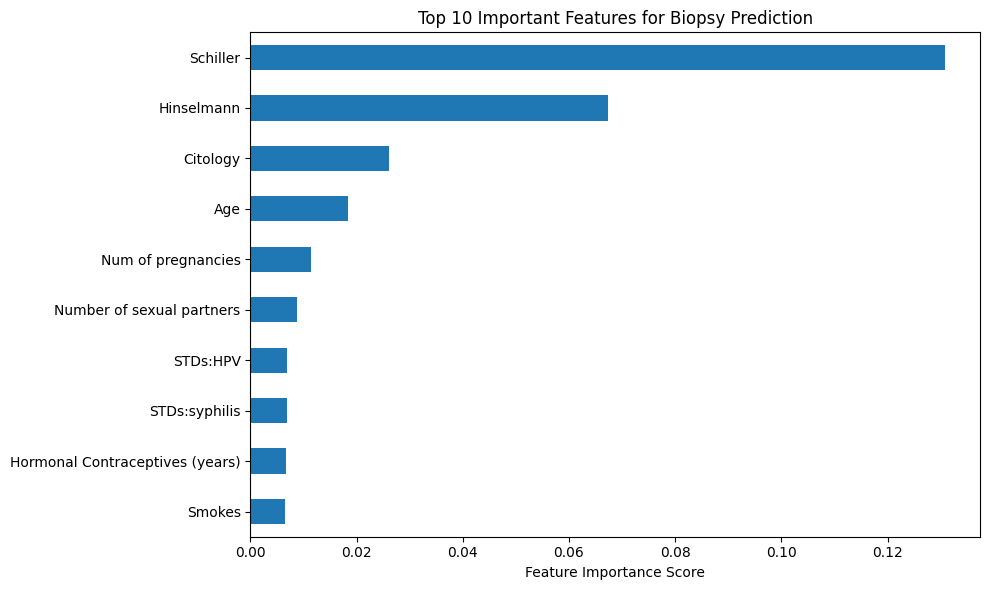

In [160]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif

X = df.drop(columns=['Biopsy'])
y = df['Biopsy']


# ----- Step 1: Variance Threshold -----
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)
X_var_df = pd.DataFrame(X_var, columns=X.columns[selector.get_support()])

# ----- Step 2: Correlation Filtering -----
corr_matrix = X_var_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.85)]
X_corr = X_var_df.drop(columns=to_drop)

 # ----- Step 3: Mutual Information Ranking -----
mi = mutual_info_classif(X_corr, y, random_state=42)
mi_series = pd.Series(mi, index=X_corr.columns).sort_values(ascending=False)

    # Select top_k features
top_features = mi_series.head(10).index
#X_selected = X_corr[top_features]

# Plot feature importance
plt.figure(figsize=(10, 6))
mi_series.head(10).plot(kind='barh')
plt.title("Top 10 Important Features for Biopsy Prediction")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **4. Model Building:**

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

X = df[top_features]
y = df['Biopsy']  # Use original binary target

# Split data into train and test
# testing size = 20 %
# rest 80 % is used for training
# stratify parameter ensures that observations from each class is are given equal weightage
(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y,test_size= 0.2)


print(f"Training Data (80%): {X_train.shape}")
print(f"Test_Data (20%): {X_test.shape}")

#
# testing size = 30 %
# rest 70 % is used for training
(X_train_3, X_test_3, y_train_3, y_test_3) = train_test_split(X, y, stratify=y,test_size= 0.3)


print(f"Training Data (70%): {X_train_3.shape}")
print(f"Test_Data (30%): {X_test_3.shape}")


split_data = {"80_20": (X_train, y_train, X_test, y_test),
              "70_30": (X_train_3, y_train_3, X_test_3, y_test_3)}
fit_result = {"80_20":{}, "70_30": {}}

Training Data (80%): (686, 10)
Test_Data (20%): (172, 10)
Training Data (70%): (600, 10)
Test_Data (30%): (258, 10)


**4.1. Logistic Regression:**

In [162]:

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=500),
                       param_grid_lr, cv=5, scoring='f1')
for key, (X_train, y_train, X_test, y_test) in split_data.items():
    print(key, len(y_test))
    grid_lr.fit(X_train, y_train)

    lr_result_df = pd.DataFrame(grid_lr.cv_results_)


    best_lr = grid_lr.best_estimator_
    print(f"The best fit params selected are \n C:{best_lr.get_params()['C']}, \n solver:{best_lr.get_params()['solver']} ")

    # predict values for the test data
    y_predict_logisticRegression  = best_lr.predict(X_test)

    y_prob_logisticRegression = best_lr.predict_proba(X_test)[:, 1]

    fit_result[key]['Logistic Regression'] = [y_predict_logisticRegression , y_prob_logisticRegression]

80_20 172
The best fit params selected are 
 C:0.01, 
 solver:lbfgs 
70_30 258
The best fit params selected are 
 C:0.01, 
 solver:lbfgs 


**4.2. Decision Tree:**

In [163]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42),
                       param_grid_dt, cv=5, scoring='f1')
for key, (X_train, y_train, X_test, y_test) in split_data.items():
    grid_dt.fit(X_train, y_train)
    best_dt = grid_dt.best_estimator_

    # predict values for the test data
    y_predict_decisionTree  = best_dt.predict(X_test)

    y_prob_decisionTree = best_dt.predict_proba(X_test)[:, 1]
    print(key, len(y_test))
    fit_result[key]['Decision Tree'] = [y_predict_decisionTree,  y_prob_decisionTree]

80_20 172
70_30 258


**4.3. K-Nearest Neighbour**

In [164]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 11],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(KNeighborsClassifier(),
                        param_grid_knn, cv=5, scoring='f1')
for key, (X_train, y_train, X_test, y_test) in split_data.items():
    grid_knn.fit(X_train, y_train)
    best_knn = grid_knn.best_estimator_
    # predict values for the test data
    y_predict_knn  = best_knn.predict(X_test)

    y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
    print(key, len(y_test))
    fit_result[key]['KNN'] = [y_predict_knn, y_prob_knn]

80_20 172
70_30 258


**4.4. Ensemble - RandomForest**

In [165]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                       param_grid_rf, cv=5, scoring='f1')
for key, (X_train, y_train, X_test, y_test) in split_data.items():
    grid_rf.fit(X_train, y_train)
    best_rf = grid_rf.best_estimator_
    # predict values for the test data
    y_predict_rf  = best_rf.predict(X_test)

    y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
    print(key, len(y_test))
    fit_result[key]['Random Forest'] = [y_predict_rf,y_prob_rf]

80_20 172
70_30 258


### **5. Model Evaluation**

**5.1. Performance Comparison:**

In this section, we will conduct a comprehensive evaluation of all trained models to identify the best performer for cervical cancer prediction.

**Key Evaluation Criteria:**  
*   Recall (Sensitivity): Most critical metric for medical diagnosis - minimizing false negatives.
*   Precision: Important for resource allocation - avoiding excessive false positives.  
*   F1-Score: Balanced measure combining precision and recall
*   ROC-AUC: Overall discriminative ability of the model  

In [166]:

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [167]:
results = []
for split, model_result in fit_result.items():
    y_test_act = split_data[split][-1]
    for model, result in model_result.items():
        y_pred, y_prob = result
        results.append({
            "Model": model,
            "Precision": precision_score(y_test_act, y_pred),
            "Recall": recall_score(y_test_act, y_pred),
            "F1-Score": f1_score(y_test_act, y_pred),
            "ROC-AUC": roc_auc_score(y_test_act, y_prob),
            "data": split
        })

#print(results)
results_df = pd.DataFrame(results)
results_df.head(10)



,Model,Precision,Recall,F1-Score,ROC-AUC,data
0,Logistic Regression,0.769231,0.909091,0.833333,0.909091,80_20
1,Decision Tree,0.600000,0.818182,0.692308,0.898927,80_20
2,KNN,0.857143,0.545455,0.666667,0.942688,80_20
3,Random Forest,0.750000,0.818182,0.782609,0.918690,80_20
4,Logistic Regression,0.736842,0.823529,0.777778,0.876495,70_30
5,Decision Tree,0.565217,0.764706,0.650000,0.870515,70_30
6,KNN,0.769231,0.588235,0.666667,0.897364,70_30
7,Random Forest,0.736842,0.823529,0.777778,0.912131,70_30


<Figure size 2400x1500 with 0 Axes>

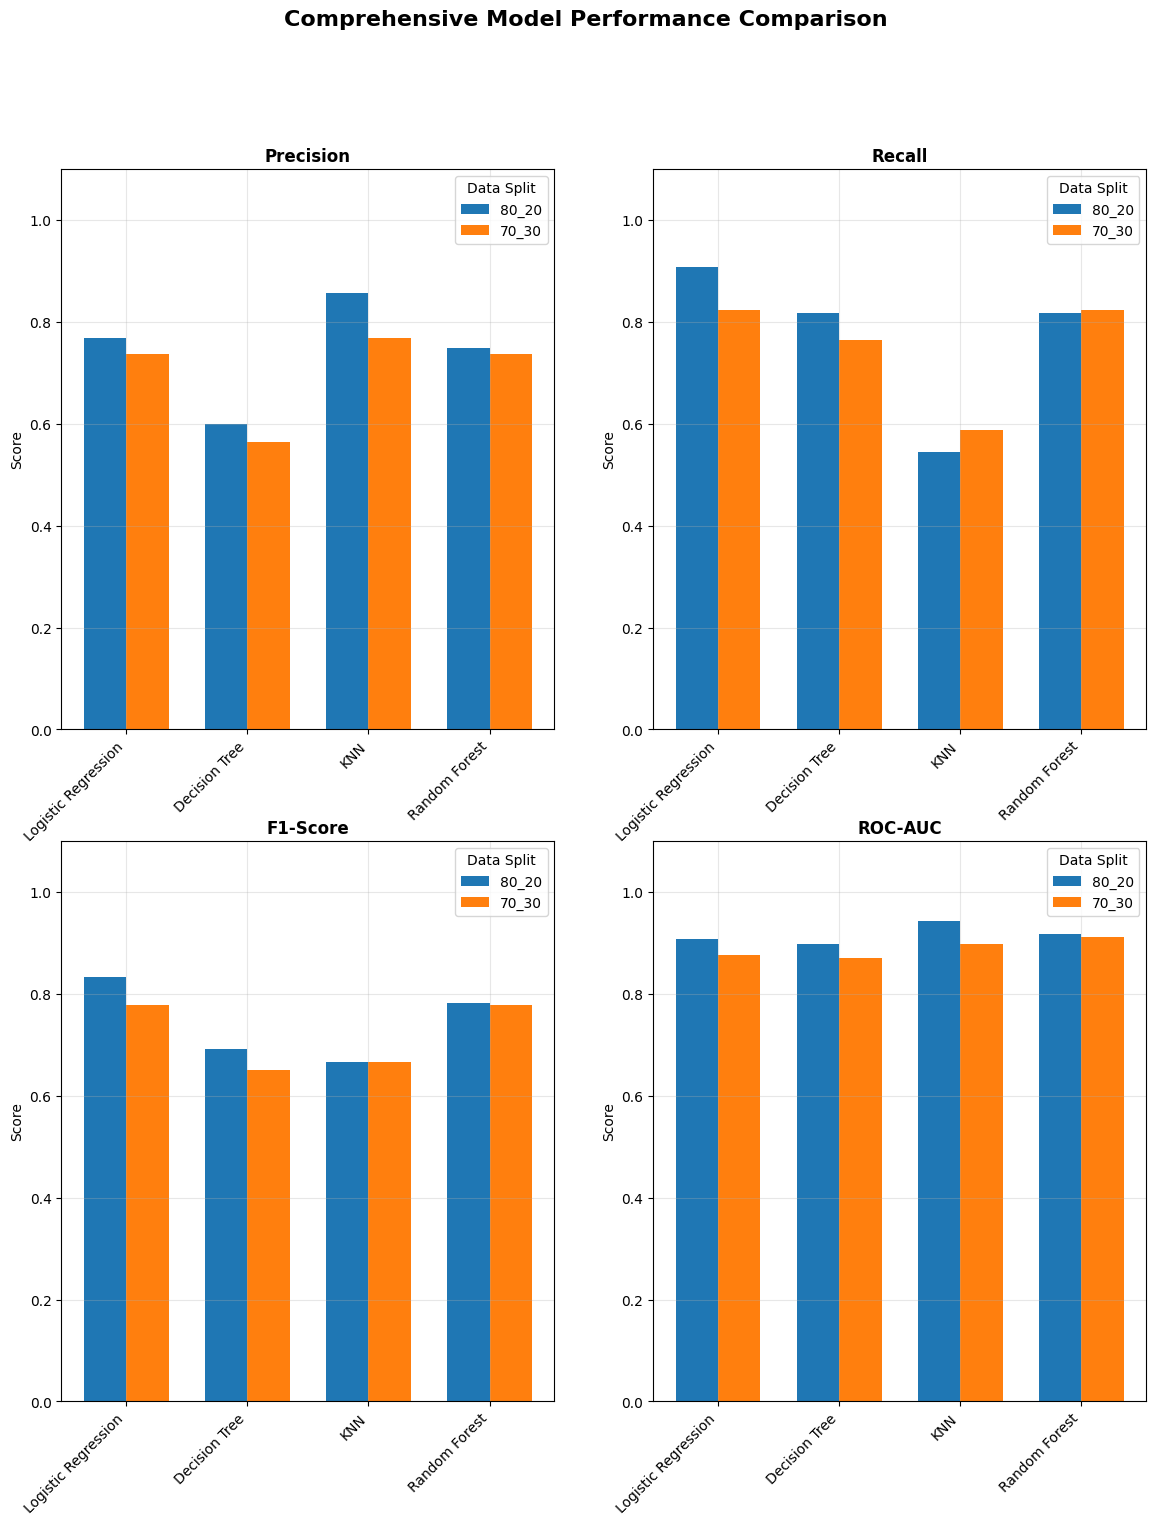

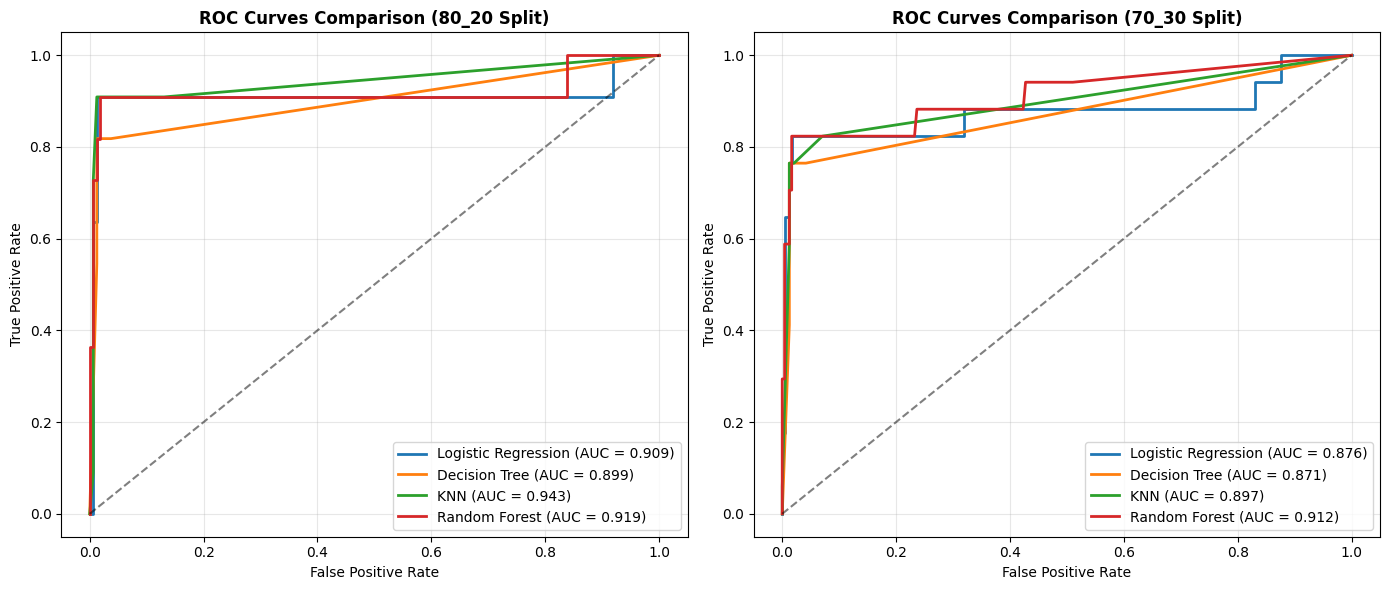

In [168]:
# Create a 3x2 grid (6 slots). We'll use 5: 4 metrics + 1 ROC curve
plt.figure(figsize=(24, 15))
#fig, axes = plt.subplots(3, 2, figsize=(14, 16))
#axes = axes.flatten()

metrics = ["Precision", "Recall", "F1-Score", "ROC-AUC"]
fig, axes = plt.subplots(2, 2, figsize=(14, 16)) # Changed to 2x2 grid for metrics
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')

# Plot individual metrics
for i, metric in enumerate(metrics):
    row = i // 2 # Changed to 2 columns
    col = i % 2 # Changed to 2 columns
    ax = axes[row, col]

    bar_width = 0.35
    models = results_df['Model'].unique()
    x_pos = np.arange(len(models))

    for j, split in enumerate(split_data.keys()):
        results_split = results_df[results_df['data'] == split]
        metric_values = results_split.set_index('Model').loc[models, metric]
        ax.bar(x_pos + j * bar_width, metric_values, bar_width, label=split)

    ax.set_xticks(x_pos + bar_width / 2)
    ax.set_xticklabels(models, rotation=45, ha="right")

    ax.set_title(f'{metric.replace("_", " ")}', fontweight='bold')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1.1)
    ax.grid(True, alpha=0.3)
    ax.legend(title="Data Split")

# ROC Curve (all models together in one subplot)
# Create a new figure and axis for the ROC curve for 70/30 split
# fig_roc_70_30, ax_roc_70_30 = plt.subplots(figsize=(10, 8))
fig_auc, axes = plt.subplots(1, 2, figsize=(14, 6)) # Changed to 1x2 grid for ROC curves
for i, split in enumerate(split_data.keys()):
    ax = axes[i]
    for model_name, model_result in fit_result[split].items(): # Using 70_30 split for ROC curve
        y_pred, y_prob = model_result
        fpr, tpr, _ = roc_curve(split_data[split][-1], y_prob)
        auc_score = roc_auc_score(split_data[split][-1], y_prob)
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', linewidth=2)

    ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f"ROC Curves Comparison ({split} Split)", fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
fig_auc.tight_layout()
fig_auc.show()

In [169]:

cm_matrix = []
#Confusion matrix for '80_20'
for model_name, model_result in fit_result['80_20'].items():
    y_pred, y_prob = model_result
    tn, fp, fn, tp = confusion_matrix(split_data['80_20'][-1], y_pred).ravel()
    cm_matrix.append({
        "Model": model_name,
        "Correctly identified cancer cases (True Positives)": tp,
        "Missed cancer cases (False Negatives)": fp,
        "False alarms (False Positives)": tn,
        "Correctly identified healthy cases (True Negatives)": fn
    })

cm_matrix_df = pd.DataFrame(cm_matrix)
cm_matrix_df.head()


,Model,Correctly identified cancer cases (True Positives),Missed cancer cases (False Negatives),False alarms (False Positives),Correctly identified healthy cases (True Negatives)
0,Logistic Regression,10,3,158,1
1,Decision Tree,9,6,155,2
2,KNN,6,1,160,5
3,Random Forest,9,3,158,2


In [170]:
cm_matrix = []
#Confusion matrix for '70_30'
for model_name, model_result in fit_result['70_30'].items():
    y_pred, y_prob = model_result
    tn, fp, fn, tp = confusion_matrix(split_data['70_30'][-1], y_pred).ravel()
    cm_matrix.append({
        "Model": model_name,
        "Correctly identified cancer cases (True Positives)": tp,
        "Missed cancer cases (False Negatives)": fp,
        "False alarms (False Positives)": tn,
        "Correctly identified healthy cases (True Negatives)": fn
    })

cm_matrix_df = pd.DataFrame(cm_matrix)
cm_matrix_df.head()

,Model,Correctly identified cancer cases (True Positives),Missed cancer cases (False Negatives),False alarms (False Positives),Correctly identified healthy cases (True Negatives)
0,Logistic Regression,14,5,236,3
1,Decision Tree,13,10,231,4
2,KNN,10,3,238,7
3,Random Forest,14,5,236,3


**5.2. Model Ranking and Selection:**  

Medical Context Consideration:  
In cancer detection, missing a positive case (false negative) is more dangerous than a false alarm (false positive). Therefore, we prioritize models with high recall while maintaining reasonable precision.

In [171]:

# Print ranking
# Create ranking based on key metrics (weighted by importance in medical context)
weights = {'Recall': 0.4, 'F1-Score': 0.3, 'ROC-AUC': 0.2, 'Precision': 0.1}
for j, split in enumerate(split_data.keys()):
    results_split = results_df[results_df['data'] == split]
    results_split['Weighted_Score'] = sum(results_split[metric] * weight
                                              for metric, weight in weights.items())

    ranking = results_split.sort_values('Weighted_Score', ascending=False)
    print("\n" + "="*60)
    print(f"MODEL RANKING (Weighted by Medical Importance) for {split} ")
    print("Weights: Recall=40%, F1=30%, ROC-AUC=20%, Precision=10%")
    print("="*60)
    for i, row in ranking.iterrows():
        print(f"{ranking.index.get_loc(i)+1}. {row['Model']}: {row['Weighted_Score']:.4f}")


MODEL RANKING (Weighted by Medical Importance) for 80_20 
Weights: Recall=40%, F1=30%, ROC-AUC=20%, Precision=10%
1. Logistic Regression: 0.8724
2. Random Forest: 0.8208
3. Decision Tree: 0.7748
4. KNN: 0.6924

MODEL RANKING (Weighted by Medical Importance) for 70_30 
Weights: Recall=40%, F1=30%, ROC-AUC=20%, Precision=10%
1. Random Forest: 0.8189
2. Logistic Regression: 0.8117
3. Decision Tree: 0.7315
4. KNN: 0.6917


/tmp/ipython-input-1031611247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_split['Weighted_Score'] = sum(results_split[metric] * weight
/tmp/ipython-input-1031611247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_split['Weighted_Score'] = sum(results_split[metric] * weight


**5.3. Conclusion:**  

Based on the metrics analysed (Recall, F1-Score, ROC-AUC, Precision and Confusion Matrix), and taking into consideration the importance of avoiding False negatives which will lead to missing a true case of cancer, we can conclude that the best model for the Cervical Cancer Risk Prediction is **Logistic Regression.**  

Logistic Regression has high Recall and best AUC Score.